In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class RemoveFirstFrame(BaseEstimator, TransformerMixin):
    def __init__(self, frame):
        self.frame = frame
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.query(f"Step % {frame} != 1")
def choose_top_rw(data,n=5):
    return data.assign(chosen=pd.DataFrame.rank(data.Rw)<=n)
def choose_top_vtotal(data,n=5):
    return data.assign(chosen=pd.DataFrame.rank(data.VTotal)<=n)
def choose_top(data,col="GDT", n=5):
    return data.assign(chosen=pd.DataFrame.rank(data[col], ascending=False)<=n)

In [50]:
raw_test_data = pd.read_csv("/Users/weilu/Research/data/test_data/test_data_4.csv")
raw_test_data_2 = raw_test_data.drop_duplicates(subset=['Qw', 'Rw', "VTotal"])
raw_test_data_2 = raw_test_data_2.assign(isGood=raw_test_data_2.groupby("Name")["GDT"].rank(ascending=False, method='first') < 21)
raw_test_data = raw_test_data_2
raw_data_T0784 = raw_test_data.groupby("Name").get_group("T0784")
raw_data_T0792 = raw_test_data.groupby("Name").get_group("T0792")
# raw_data = pd.concat([raw_data_T0784, raw_data_T0792])
# raw_data = raw_data_T0792
raw_data = raw_test_data.groupby("Name").get_group("1MBA")

chosen_by_rw = raw_test_data.groupby("Name").apply(choose_top_rw)
chosen_by_vtotal = raw_test_data.groupby("Name").apply(choose_top_vtotal)
top_rw = chosen_by_rw.query("chosen==True")
top_vtotal = chosen_by_vtotal.query("chosen==True")
best_by_GDT = raw_test_data.groupby("Name").apply(choose_top, col="GDT").query("chosen==True")

In [ ]:
g = sns.FacetGrid(raw_test_data, col="Name", col_wrap=4)
g.map(plt.scatter, "GDT", "Qw")

In [ ]:
g = sns.FacetGrid(raw_test_data, col="Name", col_wrap=4)
g.map(plt.scatter, "VTotal", "Qw")

In [ ]:
g = sns.FacetGrid(raw_test_data, col="Name", col_wrap=4)
g.map(plt.scatter, "Rw", "Qw")
# sns.pointplot(chosen.Rw, chosen.Qw, c="red", ax=g.facet_axis(0,0))

In [ ]:
g = sns.FacetGrid(best_by_GDT, col="Name", col_wrap=4)
g.map(plt.scatter, "Rw", "Qw")

In [ ]:
a2 = best_by_GDT.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"best"})
b2 = top_rw.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Rw"})
c2 = top_vtotal.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Awsem"})
final2 = a2.merge(b2, on="Name").merge(c2, on="Name").melt(id_vars="Name")
sns.pointplot("Name","value", data=final2, hue="variable")
# sns.stripplot("value", "Name", data=final2, hue="variable")

In [ ]:
sns.stripplot("value", "Name", data=final2, hue="variable")

In [ ]:
a = best_by_GDT.reset_index(drop=True)[["Name", "Qw"]].rename(index=str,columns={"Qw":"best"})
b = top_rw.reset_index(drop=True)[["Qw", "Name"]].rename(index=str,columns={"Qw":"Rw"})
c = top_vtotal.reset_index(drop=True)[["Qw", "Name"]].rename(index=str,columns={"Qw":"Awsem"})
final = a.merge(b, on="Name").merge(c, on="Name").melt(id_vars="Name")
sns.pointplot("Name","value", data=final, hue="variable")
# sns.stripplot("value", "Name", data=final, hue="variable")

In [ ]:
g = sns.FacetGrid(raw_test_data, col="Name", col_wrap=4, hue="chosenVtotal")
g.map(plt.scatter, "Rw", "Qw")

In [ ]:
t.nsmallest(5, "Rw")

In [ ]:
a = t.assign(chosen=pd.DataFrame.rank(t.Rw)<=5)
a.query("chosen==True")

In [ ]:
plt.scatter(chosen.Rw, chosen.Qw, c="red")

In [ ]:
raw_data_T0792.plot("Rw", "GDT", kind="scatter")

In [ ]:
plt.scatter(y_pred, train_y)

In [ ]:
t = raw_test_data.head()

In [ ]:
t = pd.Series(np.array([1,2,2,4,5]))

In [ ]:
t.rank(method="first")

In [39]:
FEATURES = ['Rw',
#  'VTotal',
 'QGO',
#  'Burial',
#  'Water',
#  'Rama',
#      'DSSP',
#      'P_AP',
#  'Helix',
#  'Frag_Mem']
# LABEL = "Qw"
LABEL = label
PolynomialDegree = degree

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class RemoveFirstFrame(BaseEstimator, TransformerMixin):
    def __init__(self, frame):
        self.frame = frame
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.query(f"Step % {frame} != 1")

num_attribs = FEATURES
cat_attribs = [LABEL]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs))
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

SyntaxError: invalid syntax (<ipython-input-39-86cfbbddd5ba>, line 12)

In [42]:
def my_transform(data, label, degree, p):
    FEATURES = ['Rw',
#      'VTotal',
     'QGO',
#      'Burial',
#      'Water',
#      'Rama',
#      'DSSP',
#      'P_AP',
#      'Helix',
#      'Frag_Mem'
               ]
    # LABEL = "Qw"
    LABEL = label
    PolynomialDegree = degree

    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import FeatureUnion
    from sklearn.preprocessing import PolynomialFeatures
    # Create a class to select numerical or categorical columns 
    # since Scikit-Learn doesn't handle DataFrames yet
    class DataFrameSelector(BaseEstimator, TransformerMixin):
        def __init__(self, attribute_names):
            self.attribute_names = attribute_names
        def fit(self, X, y=None):
            return self
        def transform(self, X):
            return X[self.attribute_names].values
    class RemoveFirstFrame(BaseEstimator, TransformerMixin):
        def __init__(self, frame):
            self.frame = frame
        def fit(self, X, y=None):
            return self
        def transform(self, X):
            return X.query(f"Step % {frame} != 1")

    num_attribs = FEATURES
    cat_attribs = [LABEL]
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('std_scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
        ])
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs))
        ])

    full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline),
        ])
    return full_pipeline.fit_transform(data)

In [43]:
# FEATURES = ["Rw", "VTotal", "QGO"]
# FEATURES = ["Rw", "VTotal", "QGO", "Burial", "Frag_Mem", "Water"]
# FEATURES = list(raw_test_data.columns[2:-3])
def train_and_test(label="GDT", degree=1, p=0.1):
    # my_full_pipeline = Pipeline([
    # #         ('removeFirstFrame', RemoveFirstFrame(frame)),
    #         ('featureSelection', full_pipeline)
    # ])

    from sklearn.model_selection import StratifiedShuffleSplit

    split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=142)
    for train_index, test_index in split.split(raw_data, raw_data["isGood"]):
        strat_train_set = raw_data.iloc[train_index]
        strat_test_set = raw_data.iloc[test_index]
    # strat_test_set[LABEL].value_counts() / len(strat_test_set)
    X_train = my_transform(strat_train_set, label, degree, p)
    X_test = my_transform(strat_test_set, label, degree, p)
    train_y = X_train[:,-1]
    train_set = X_train[:,:-1]
    test_y = X_test[:,-1]
    test_set = X_test[:,:-1]
    return (train_set, train_y, test_set, test_y)

In [44]:
train_set, train_y, test_set, test_y = train_and_test(label="GDT")
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_set, train_y)
y_pred = regr.predict(train_set)

In [45]:
label = "isGood"
degree = 1
train_set, train_y, test_set, test_y = train_and_test(label=label, degree=degree)
log_clf = LogisticRegression(random_state=140, penalty='l1')
p = 0.1
# log_clf = LogisticRegression(random_state=14, class_weight={0:p, 1:(1-p)}, penalty='l1')
log_clf.fit(train_set, train_y)
y_pred = log_clf.predict(train_set)
n = 10
prediction_list = []
for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = full_pipeline.fit_transform(data)
    X = my_transform(data, label, degree, p)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= log_clf.predict_proba(eval_set)[:,1]
    prediction_list.append(pd.Series(test))
prediction = pd.concat(prediction_list)
t = raw_test_data.assign(prediction=prediction.values)
best_by_prediction = t.groupby("Name").apply(choose_top, col="prediction").query("chosen==True")

1MBA
T0766
T0784
T0792
T0803
T0815
T0833
T251


In [46]:
FEATURES

['Rw', 'VTotal', 'QGO', 'Rama', 'Helix', 'Frag_Mem']

In [47]:
log_clf.coef_

array([[-1.31137435, -1.5971631 ]])

In [48]:
print(*(zip(FEATURES, log_clf.coef_[0])))

('Rw', -1.311374347301536) ('VTotal', -1.5971631038018952)


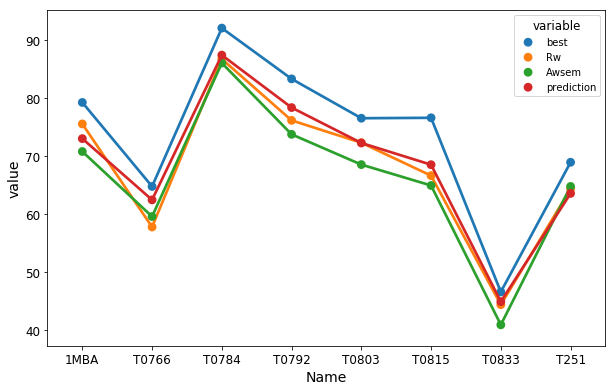

In [49]:
a2 = best_by_GDT.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"best"})
b2 = top_rw.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Rw"})
c2 = top_vtotal.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Awsem"})
d2 = best_by_prediction.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"prediction"})
# final2 = a2.merge(b2, on="Name").merge(c2, on="Name").merge(d2, on="Name").melt(id_vars="Name")
final2 = pd.concat([a2, b2["Rw"], c2["Awsem"], d2["prediction"]], axis=1).melt(id_vars="Name")
# sns.pointplot("Name","value", data=final2, hue="variable", hue_order=["prediction", "Awsem", "Rw", "best"])
# sns.stripplot("value", "Name", data=final2, hue="variable")
sns.pointplot("Name","value", data=final2, hue="variable", errwidth=0)

In [ ]:
sns.boxplot("Name","value", data=final2, hue="variable")

In [ ]:
sns.swarmplot(x='Name', y='value', data=final2, hue="variable")

In [ ]:
sns.stripplot("Name", "value", data=final2, hue="variable", jitter=True)

In [ ]:
sns.stripplot("value", "Name", data=final2, hue="variable", jitter=True)

In [ ]:
a2 = best_by_GDT.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"best"})
b2 = top_rw.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Rw"})
c2 = top_vtotal.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Awsem"})
d2 = best_by_prediction.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"prediction"})
final2 = a2.merge(b2, on="Name").merge(c2, on="Name").merge(d2, on="Name").melt(id_vars="Name")
sns.pointplot("Name","value", data=final2, hue="variable")
# sns.stripplot("value", "Name", data=final2, hue="variable")

In [ ]:
a2 = best_by_GDT.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"best"})
b2 = top_rw.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Rw"})
c2 = top_vtotal.reset_index(drop=True)[["GDT", "Name"]].rename(index=str,columns={"GDT":"Awsem"})
d2 = best_by_prediction.reset_index(drop=True)[["Name", "GDT"]].rename(index=str,columns={"GDT":"prediction"})
final2 = a2.merge(b2, on="Name").merge(c2, on="Name").merge(d2, on="Name").melt(id_vars="Name")
sns.pointplot("Name","value", data=final2, hue="variable")
# sns.stripplot("value", "Name", data=final2, hue="variable")

In [ ]:
np.sum(y_pred != train_y)

In [ ]:
prediction.shape

In [ ]:
raw_test_data.shape

In [ ]:
y_pred.shape

In [ ]:
eval_y.argsort()[-n:][::-1]

In [ ]:
n = 10
for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = full_pipeline.fit_transform(data)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= regr.predict(eval_set)
    position_of_top_n = test.argsort()[-n:][::-1]
    threshold = test[position_of_top_n][-1]
    predict_y = np.zeros(len(eval_y),)
    predict_y[position_of_top_n] = 1

    position_of_top_n = eval_y.argsort()[-50:][::-1]
    threshold = eval_y[position_of_top_n][-1]
    test_y = np.zeros(len(eval_y),)
    test_y[position_of_top_n] = 1
    plt.figure()
    plt.scatter(test, eval_y)
    plt.show()

#     predict_y = (test > threshold)
#     print(threshold)
    print(confusion_matrix(test_y, predict_y))

In [ ]:
plt.scatter(y_pred, train_y)

In [ ]:



from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# log_clf = LogisticRegression(random_state=142)
# rnd_clf = RandomForestClassifier(random_state=432)
# svm_clf = SVC(probability=True, random_state=412)
log_clf = LogisticRegression(random_state=142, class_weight={0:p, 1:(1-p)})
rnd_clf = RandomForestClassifier(random_state=432, class_weight={0:p, 1:(1-p)})
svm_clf = SVC(probability=True, random_state=412, class_weight={0:p, 1:(1-p)})

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
log_clf.fit(train_set, train_y)
rnd_clf.fit(train_set, train_y)
svm_clf.fit(train_set, train_y)
voting_clf.fit(train_set, train_y)


# check on training set
n = 10
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     y_pred = clf.predict(train_set)
    prob= clf.predict_proba(train_set)[:,1]
    position_of_top_n = prob.argsort()[-n:][::-1]
    threshold = prob[position_of_top_n][-1]
    predict_y = np.zeros(len(train_y),)
    predict_y[position_of_top_n] = 1
#     predict_y = (test > threshold)
#     print(threshold)
    cm = confusion_matrix(train_y, predict_y)
#     print(clf.__class__.__name__, "\n", accuracy_score(train_y, predict_y))
    print(clf.__class__.__name__, "\n", cm)
    
time_stamp = f"{datetime.today().strftime('%d_%h_%H%M%S')}"
for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = full_pipeline.fit_transform(data)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= log_clf.predict_proba(eval_set)[:,1]
    position_of_top_n = test.argsort()[-n:][::-1]
    threshold = test[position_of_top_n][-1]
    predict_y = np.zeros(len(eval_y),)
    predict_y[position_of_top_n] = 1

    with open(f"/Users/weilu/Research/data/structure_selector/p{p}_poly{PolynomialDegree}_{name}.csv", "w") as f:
        f.write("Result\n")
        for i in test:
            f.write(str(i) + "\n")
#     with open(f"/Users/weilu/Research/data/structure_selector/{name}_results_{time_stamp}.csv", "w") as f:
#         f.write("Result\n")
#         for i in test:
#             f.write(str(i) + "\n")

#     predict_y = (test > threshold)
#     print(threshold)
    print(confusion_matrix(eval_y, predict_y))
print(f"p{p}_poly{PolynomialDegree}")

In [ ]:
raw_test_data = pd.read_csv("/Users/weilu/Research/data/test_data/test_data_4.csv")
raw_test_data_2 = raw_test_data.drop_duplicates(subset=['Qw', 'Rw', "VTotal"])
raw_test_data_2 = raw_test_data_2.assign(isGood=raw_test_data_2.groupby("Name")["GDT"].rank(ascending=False, method='first') < 50)
raw_test_data = raw_test_data_2
raw_data_T0784 = raw_test_data.groupby("Name").get_group("T0784")
raw_data_T0792 = raw_test_data.groupby("Name").get_group("T0792")
# raw_data = pd.concat([raw_data_T0784, raw_data_T0792])
raw_data = raw_data_T0792

In [ ]:
# FEATURES = ["Rw", "VTotal", "QGO"]
# FEATURES = ["Rw", "VTotal", "QGO", "Burial", "Frag_Mem", "Water"]
# FEATURES = list(raw_test_data.columns[2:-3])
FEATURES = ['Rw',
 'VTotal',
 'QGO',
 'Burial',
 'Water',
 'Rama',
 'DSSP',
 'P_AP',
 'Helix',
 'Frag_Mem']
# LABEL = "Qw"
LABEL = "isGood"
PolynomialDegree = 2
p = 0.1


num_attribs = FEATURES
cat_attribs = [LABEL]
frame = 201
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs))
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
my_full_pipeline = Pipeline([
#         ('removeFirstFrame', RemoveFirstFrame(frame)),
        ('featureSelection', full_pipeline)
])
    
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data["isGood"]):
    strat_train_set = raw_data.iloc[train_index]
    strat_test_set = raw_data.iloc[test_index]
# strat_test_set[LABEL].value_counts() / len(strat_test_set)
X_train = my_full_pipeline.fit_transform(strat_train_set)
X_test = my_full_pipeline.fit_transform(strat_test_set)
train_y = X_train[:,-1]
train_set = X_train[:,:-1]
test_y = X_test[:,-1]
test_set = X_test[:,:-1]



# log_clf = LogisticRegression(random_state=142)
# rnd_clf = RandomForestClassifier(random_state=432)
# svm_clf = SVC(probability=True, random_state=412)
log_clf = LogisticRegression(random_state=142, class_weight={0:p, 1:(1-p)})

log_clf.fit(train_set, train_y)


# check on training set
n = 5

clf = log_clf
#     y_pred = clf.predict(train_set)
prob= clf.predict_proba(train_set)[:,1]
position_of_top_n = prob.argsort()[-n:][::-1]
threshold = prob[position_of_top_n][-1]
predict_y = np.zeros(len(train_y),)
predict_y[position_of_top_n] = 1
#     predict_y = (test > threshold)
#     print(threshold)
cm = confusion_matrix(train_y, predict_y)
#     print(clf.__class__.__name__, "\n", accuracy_score(train_y, predict_y))
print(clf.__class__.__name__, "\n", cm)



for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = full_pipeline.fit_transform(data)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= log_clf.predict_proba(eval_set)[:,1]
    position_of_top_n = test.argsort()[-n:][::-1]
    threshold = test[position_of_top_n][-1]
    predict_y = np.zeros(len(eval_y),)
    predict_y[position_of_top_n] = 1
    print(confusion_matrix(eval_y, predict_y))
print(f"p{p}_poly{PolynomialDegree}")



In [ ]:
strat_train_set["a"] = prob

In [ ]:
strat_train_set.plot("a", "GDT", kind="scatter")

In [ ]:
prob

In [ ]:
pd.concat([strat_train_set, pd.Series(prob)], axis=1)

In [ ]:
def compute_with_my_score_function(p=0.9, PolynomialDegree=3):
    FEATURES = ['Rw',
     'VTotal',
     'QGO',
     'Burial',
     'Water',
     'Rama',
     'DSSP',
     'P_AP',
     'Helix',
     'Frag_Mem']
    # LABEL = "Qw"
    LABEL = "isGood"

    num_attribs = FEATURES
    cat_attribs = [LABEL]
    frame = 201
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('std_scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
        ])
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs))
        ])

    full_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cat_pipeline", cat_pipeline),
        ])
    my_full_pipeline = Pipeline([
    #         ('removeFirstFrame', RemoveFirstFrame(frame)),
            ('featureSelection', full_pipeline)
    ])

    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(raw_data, raw_data["isGood"]):
        strat_train_set = raw_data.iloc[train_index]
        strat_test_set = raw_data.iloc[test_index]
    # strat_test_set[LABEL].value_counts() / len(strat_test_set)
    X_train = my_full_pipeline.fit_transform(strat_train_set)
    X_test = my_full_pipeline.fit_transform(strat_test_set)
    train_y = X_train[:,-1]
    train_set = X_train[:,:-1]
    test_y = X_test[:,-1]
    test_set = X_test[:,:-1]

    # log_clf = LogisticRegression(random_state=142)
    # rnd_clf = RandomForestClassifier(random_state=432)
    # svm_clf = SVC(probability=True, random_state=412)
    log_clf = LogisticRegression(random_state=142, class_weight={0:p, 1:(1-p)})
    log_clf.fit(train_set, train_y)

#     voting_clf.fit(train_set, train_y)
    n = 10
    cl_name = "lr"
    clf = log_clf
#     for cl_name, clf in ("voting", voting_clf):
    my_evaluation = 1.0
    another_evaluation = 0.0
    for name, data in raw_test_data.groupby("Name"):
#             print(name)
#         X = full_pipeline.fit_transform(data)
#         validation_data, test_data = train_test_split(X, test_size=0.6, random_state=124)
        validation_data = my_full_pipeline.fit_transform(raw_data_T0784)
        validation_y = validation_data[:,-1]
        validation_set = validation_data[:,:-1]
        clf.fit(train_set, train_y)
        test= clf.predict_proba(validation_set)[:,1]
        position_of_top_n = test.argsort()[-n:][::-1]
        threshold = test[position_of_top_n][-1]
        predict_y = np.zeros(len(validation_y),)
        predict_y[position_of_top_n] = 1
    #     predict_y = (test > threshold)
#         print(threshold)
        cm = confusion_matrix(validation_y, predict_y)
#             print(cm)
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
#             print(name,  " precision", precision,end = " ")
        if name != "T0766" and name != "T0833":
            my_evaluation *= precision
            another_evaluation += precision
#         print("")
    print("classifier:", cl_name, ", p:",p, ", degree", PolynomialDegree, ", score", my_evaluation, ", another score", another_evaluation)
    return (cl_name, p, PolynomialDegree, my_evaluation)

In [ ]:
def myGridSerach():
    p_list = [0.9, 0.8, 0.7, 0.5, 0.1]
    degree_list = [3, 2, 1]
#     p_list = [0.1, 0.8, 0.9, 0.95]
#     degree_list = [1, 2, 3]
#     p_list = [0.1, 0.15, 0.2, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95]
#     degree_list = [1, 2, 3, 4]
    result = []
    for p in p_list:
        for degree in degree_list:
            result += [compute_with_my_score_function(p, degree)]
            

In [ ]:
myGridSerach()

In [ ]:
compute_with_my_score_function(0.1, 1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
class RemoveFirstFrame(BaseEstimator, TransformerMixin):
    def __init__(self, frame):
        self.frame = frame
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.query(f"Step % {frame} != 1")

In [ ]:
num_attribs = FEATURES
cat_attribs = [LABEL]
frame = 201
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=PolynomialDegree, include_bias=False))
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs))
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
my_full_pipeline = Pipeline([
#         ('removeFirstFrame', RemoveFirstFrame(frame)),
        ('featureSelection', full_pipeline)
])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data["isGood"]):
    strat_train_set = raw_data.iloc[train_index]
    strat_test_set = raw_data.iloc[test_index]
# strat_test_set[LABEL].value_counts() / len(strat_test_set)
X_train = my_full_pipeline.fit_transform(strat_train_set)
X_test = my_full_pipeline.fit_transform(strat_test_set)
train_y = X_train[:,-1]
train_set = X_train[:,:-1]
test_y = X_test[:,-1]
test_set = X_test[:,:-1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# log_clf = LogisticRegression(random_state=142)
# rnd_clf = RandomForestClassifier(random_state=432)
# svm_clf = SVC(probability=True, random_state=412)
log_clf = LogisticRegression(random_state=142, class_weight={0:p, 1:(1-p)})
rnd_clf = RandomForestClassifier(random_state=432, class_weight={0:p, 1:(1-p)})
svm_clf = SVC(probability=True, random_state=412, class_weight={0:p, 1:(1-p)})

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
log_clf.fit(train_set, train_y)
rnd_clf.fit(train_set, train_y)
svm_clf.fit(train_set, train_y)
voting_clf.fit(train_set, train_y)

In [ ]:
# check on training set
n = 10
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     y_pred = clf.predict(train_set)
    prob= clf.predict_proba(train_set)[:,1]
    position_of_top_n = prob.argsort()[-n:][::-1]
    threshold = prob[position_of_top_n][-1]
    predict_y = np.zeros(len(train_y),)
    predict_y[position_of_top_n] = 1
#     predict_y = (test > threshold)
#     print(threshold)
    cm = confusion_matrix(train_y, predict_y)
#     print(clf.__class__.__name__, "\n", accuracy_score(train_y, predict_y))
    print(clf.__class__.__name__, "\n", cm)

In [ ]:
time_stamp = f"{datetime.today().strftime('%d_%h_%H%M%S')}"
for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = full_pipeline.fit_transform(data)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= log_clf.predict_proba(eval_set)[:,1]
    position_of_top_n = test.argsort()[-n:][::-1]
    threshold = test[position_of_top_n][-1]
    predict_y = np.zeros(len(eval_y),)
    predict_y[position_of_top_n] = 1

    with open(f"/Users/weilu/Research/data/structure_selector/p{p}_poly{PolynomialDegree}_{name}.csv", "w") as f:
        f.write("Result\n")
        for i in test:
            f.write(str(i) + "\n")
#     with open(f"/Users/weilu/Research/data/structure_selector/{name}_results_{time_stamp}.csv", "w") as f:
#         f.write("Result\n")
#         for i in test:
#             f.write(str(i) + "\n")

#     predict_y = (test > threshold)
#     print(threshold)
    print(confusion_matrix(eval_y, predict_y))

In [ ]:
time_stamp = f"{datetime.today().strftime('%d_%h_%H%M%S')}"
for name, data in raw_test_data.groupby("Name"):
    print(name)
    X = my_full_pipeline.fit_transform(data)
    eval_y = X[:,-1]
    eval_set = X[:,:-1]
    test= log_clf.predict_proba(eval_set)[:,1]
    position_of_top_n = test.argsort()[-n:][::-1]
    threshold = test[position_of_top_n][-1]
    predict_y = np.zeros(len(eval_y),)
    predict_y[position_of_top_n] = 1


#     predict_y = (test > threshold)
#     print(threshold)
    print(confusion_matrix(eval_y, predict_y))